<a href="https://colab.research.google.com/github/Huong2k1/AI_homework/blob/main/Monney_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model




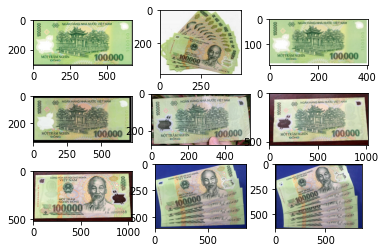

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/gdrive/MyDrive/data_money/train/100k/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'c' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                 validation_split=0.2
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/gdrive/MyDrive/data_money/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

Found 167 images belonging to 11 classes.


In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=40,verbose=1)
                  

Epoch 1/40
17/17 [==============================] - 28s 2s/step - loss: 3.1034 - accuracy: 0.1916
Epoch 2/40
17/17 [==============================] - 12s 669ms/step - loss: 2.2437 - accuracy: 0.2934
Epoch 3/40
17/17 [==============================] - 12s 672ms/step - loss: 2.0297 - accuracy: 0.3293
Epoch 4/40
17/17 [==============================] - 12s 670ms/step - loss: 1.6401 - accuracy: 0.4491
Epoch 5/40
17/17 [==============================] - 12s 693ms/step - loss: 1.5142 - accuracy: 0.5269
Epoch 6/40
17/17 [==============================] - 12s 667ms/step - loss: 1.4228 - accuracy: 0.5749
Epoch 7/40
17/17 [==============================] - 12s 666ms/step - loss: 1.3522 - accuracy: 0.5329
Epoch 8/40
17/17 [==============================] - 12s 667ms/step - loss: 1.4026 - accuracy: 0.5329
Epoch 9/40
17/17 [==============================] - 11s 664ms/step - loss: 1.0945 - accuracy: 0.6707
Epoch 10/40
17/17 [==============================] - 11s 665ms/step - loss: 1.3001 - accuracy:

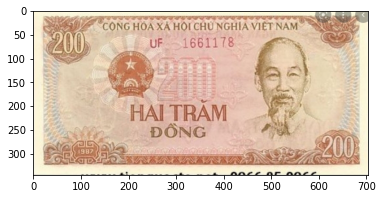

200


In [ ]:
filename = '/content/gdrive/MyDrive/data_money/test/200/m3.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('100')
elif kq ==1:
  print('100k')
elif kq ==2:
  print('10k')
elif kq ==3:
  print('1k')
elif kq ==4:
  print('200')
elif kq ==5:
  print('200k')
elif kq ==6:
  print('2k')
elif kq ==7:
  print('500')
elif kq ==8:
  print('500k')
elif kq ==9:
  print('50k')
elif kq ==10:
  print('5k')

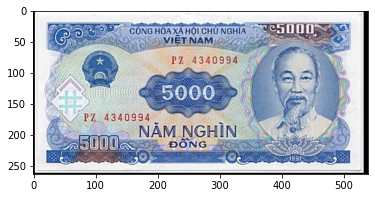

5k


In [ ]:
filename = '/content/gdrive/MyDrive/data_money/test/5k/f0.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('100')
elif kq ==1:
  print('100k')
elif kq ==2:
  print('10k')
elif kq ==3:
  print('1k')
elif kq ==4:
  print('200')
elif kq ==5:
  print('200k')
elif kq ==6:
  print('2k')
elif kq ==7:
  print('500')
elif kq ==8:
  print('500k')
elif kq ==9:
  print('50k')
elif kq ==10:
  print('5k')

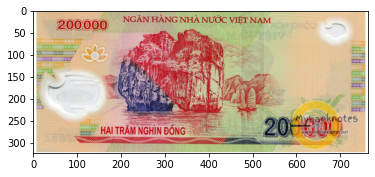

200k


In [ ]:
filename = '/content/gdrive/MyDrive/data_money/test/200k/v3.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('100')
elif kq ==1:
  print('100k')
elif kq ==2:
  print('10k')
elif kq ==3:
  print('1k')
elif kq ==4:
  print('200')
elif kq ==5:
  print('200k')
elif kq ==6:
  print('2k')
elif kq ==7:
  print('500')
elif kq ==8:
  print('500k')
elif kq ==9:
  print('50k')
elif kq ==10:
  print('5k')